In [1]:
%pylab inline
import cv2 as cv
import numpy as np
import argparse

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 

In [3]:
from structure_tensor import *

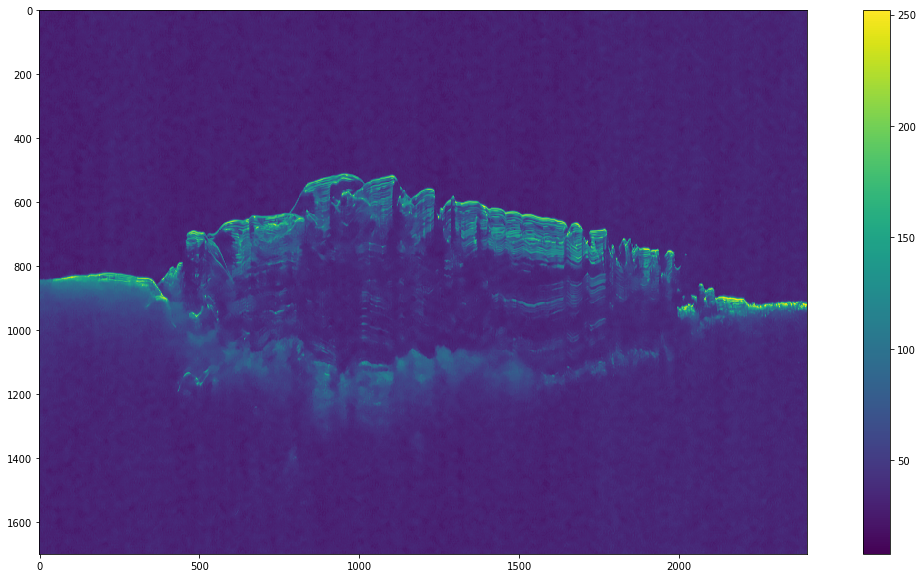

In [4]:
image = ApplyDenoising("sharad_data/s_00429402_thm.jpg")

imgInTiny, imgCoherency, ori, imgCoherencyBin, ori_bin, imgBin, imgBinClear = ApplyStructureTensor(image)

figure(figsize=(20,10))

imshow(imgInTiny)
colorbar()

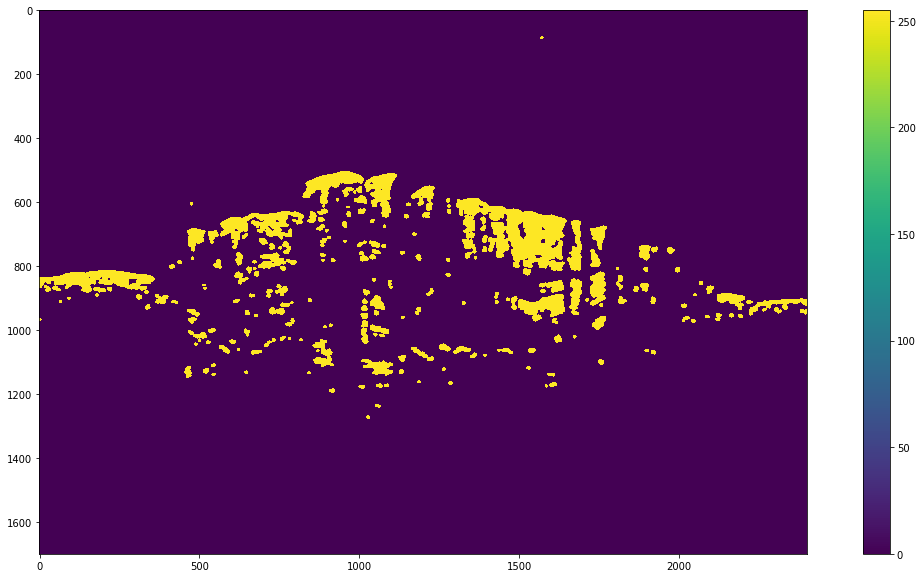

In [5]:
figure(figsize=(20,10))

imshow(imgBinClear)
colorbar()

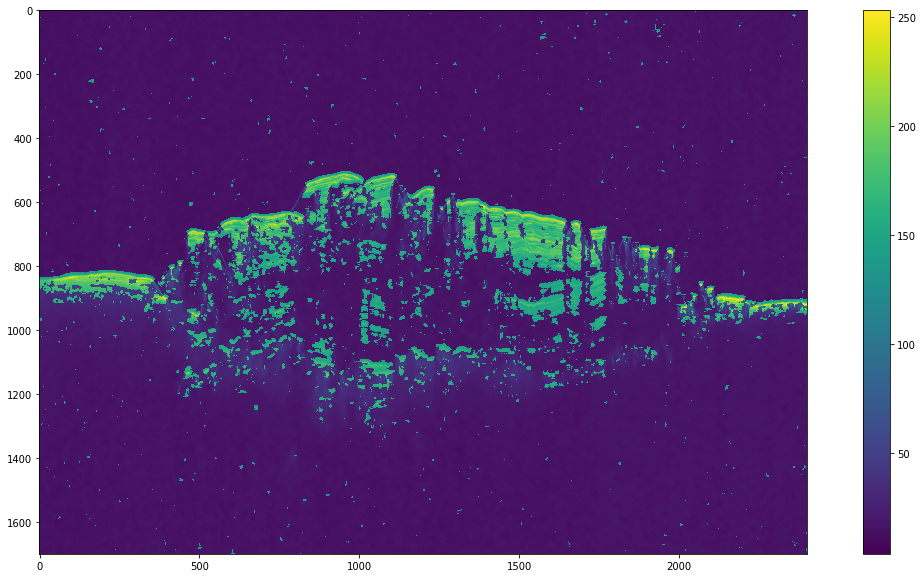

In [6]:
#res = np.uint8(0.5*(imgIn + imgBin))
resTiny = np.uint8(0.5*(imgInTiny + imgBin))
Edges = cv.Canny(imgInTiny,50,100) #2nd,3rd: lower and upper threshold

figure(figsize=(20,10))

imshow(resTiny)
colorbar()

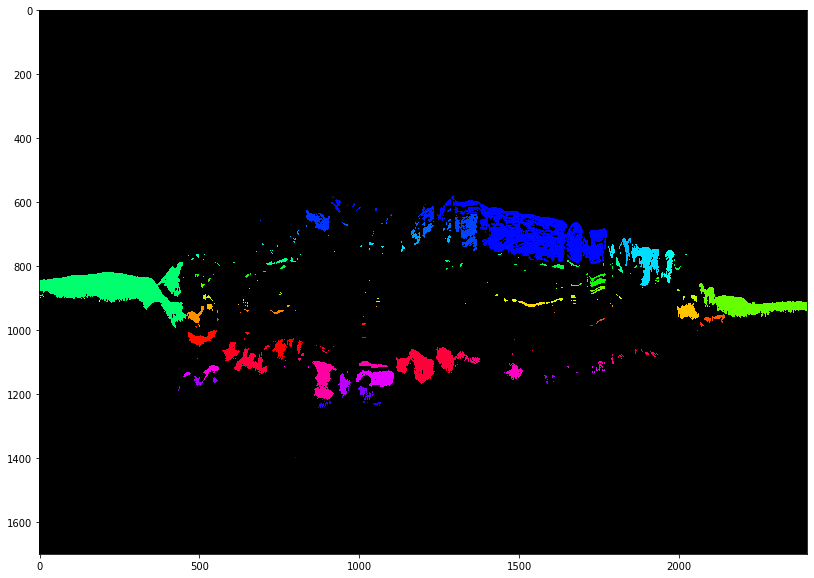

In [7]:
from ConnectedComp import imshow_components

figure(figsize=(20,10))
a = imshow_components(imgInTiny)
imshow(a)

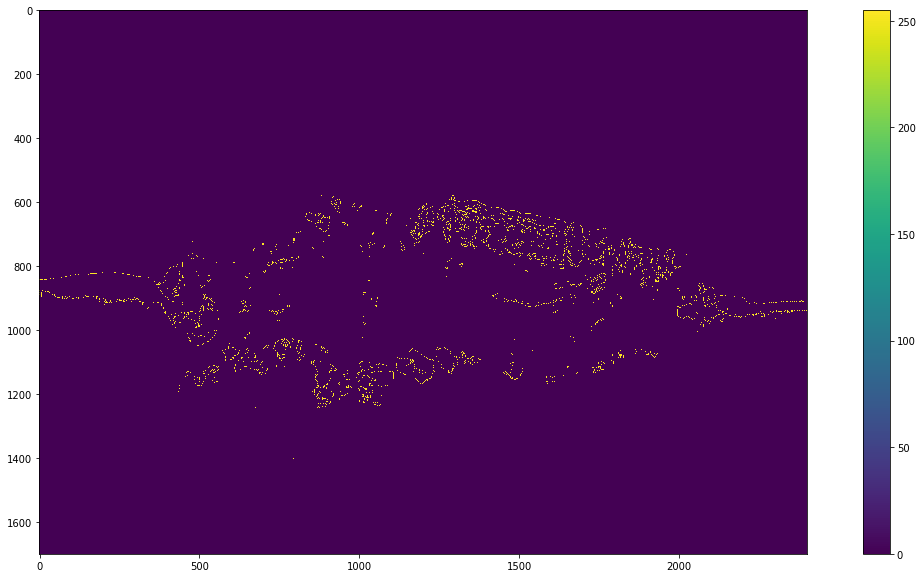

In [8]:
cannylab = cv.Canny(a,50,100)
figure(figsize=(20,10))
imshow(cannylab)
colorbar()

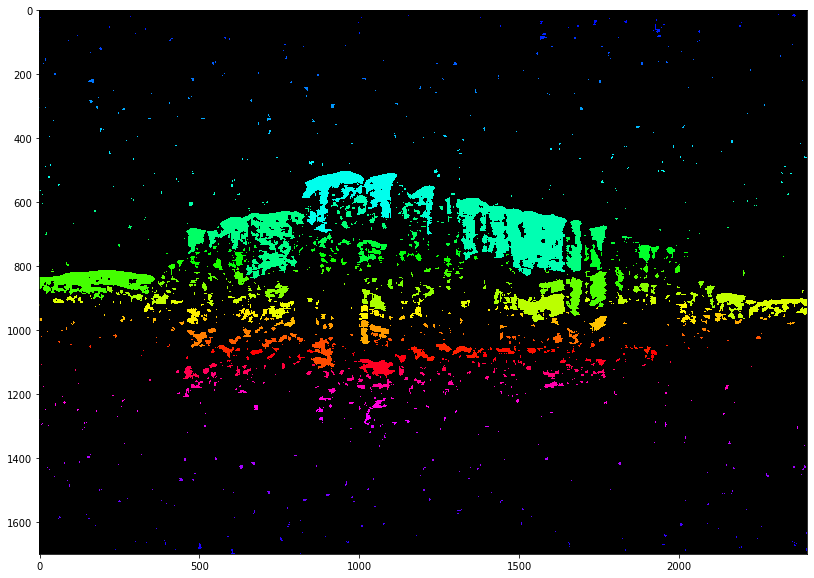

In [9]:
from ConnectedComp import connected_components_for_binaryimg

ori_conncomp = connected_components_for_binaryimg(ori_bin)    

figure(figsize=(20,10))
imshow(ori_conncomp)

# Selection of bigger components

In [10]:
#selection of connected components with pixel area > certain value (valuemean)

from ConnectedComp import selection

index, areas, arearray = selection(imgInTiny)

Total number of connected components: 490
Average area of connected components: 8326.530612244898
Labels of connected components with pixel area higher than average: [0, 1, 3, 131, 198]
Number of pixels of each selected area: [3862598, 47344, 44073, 34923, 13037]

[[      0 3862598]
 [      1   47344]
 [      3   44073]
 [    131   34923]
 [    198   13037]]


New label for 0 component: 0
New label for 1 component: 51
New label for 3 component: 102
New label for 131 component: 153
New label for 198 component: 204


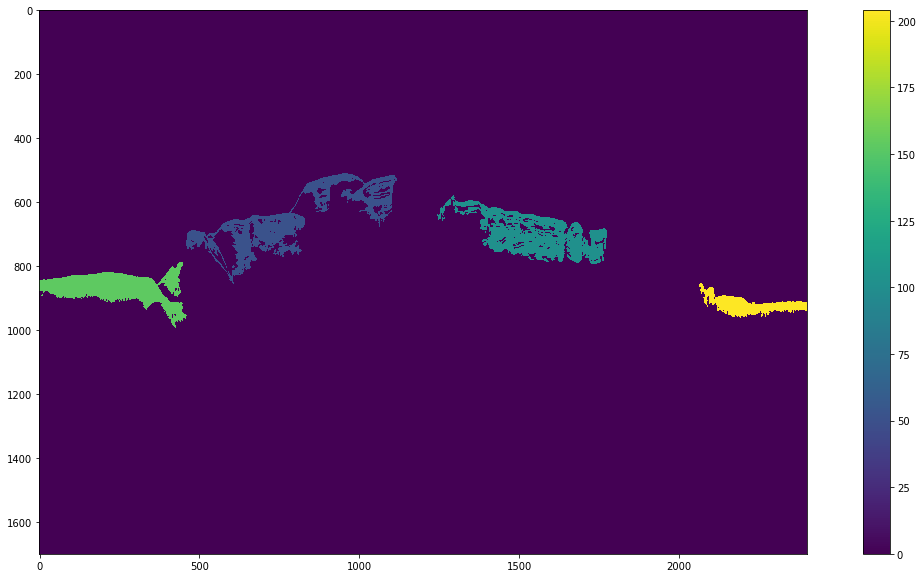

In [11]:
#new array image with only the components having area[pixel]> average area of all components
from ConnectedComp import newimgbigcomponents

newimg, huenewimg = newimgbigcomponents(imgInTiny,index)

figure(figsize=(20,10))
imshow(newimg)
colorbar()

#imsave('conncomp_selection.png',newimg,vmin=newimg.min(), vmax=newimg.max())

In [12]:
import imageio
newimg_uint8 = np.uint8(179*newimg/np.max(newimg))
imageio.imwrite('conncomp_selection.png', newimg_uint8)

print(newimg_uint8.dtype)

uint8


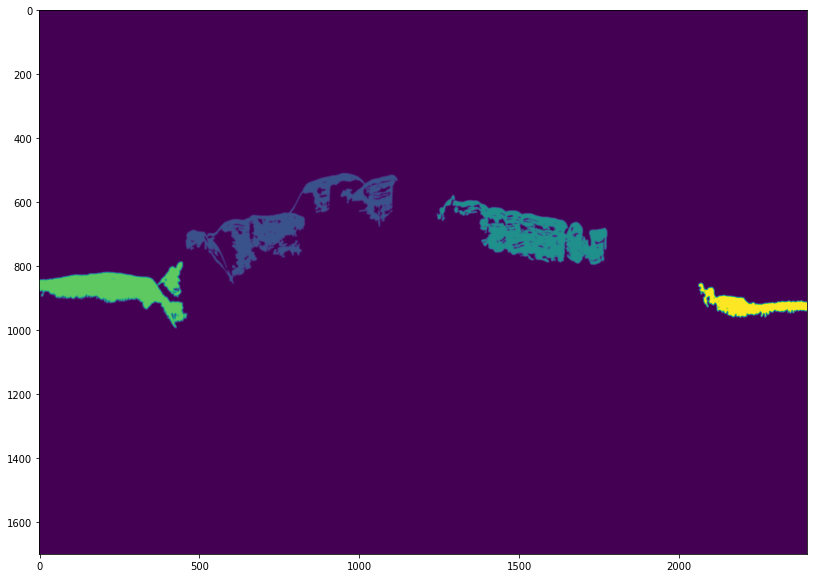

In [12]:
#with edges
figure(figsize=(20,10))
imshow(newimg,interpolation='bicubic')
#imshow(newimg,interpolation='spline16')
#imshow(newimg,interpolation='spline36')

In [13]:
indexoribin, areasoribin, arrayoribin = selection(ori_bin)

Total number of connected components: 2132
Average area of connected components: 1913.6960600375235
Labels of connected components with pixel area higher than average: [0, 387, 390, 426, 467, 524, 546, 571, 581, 637, 815, 829, 866, 881, 960, 981, 995, 1034, 1056, 1328, 1484]
Number of pixels of each selected area: [3802133, 11633, 9649, 4358, 46439, 24758, 4909, 2384, 2935, 2506, 17610, 4600, 3541, 2280, 2405, 8808, 3861, 4935, 1997, 3609, 3524]

[[      0 3802133]
 [    387   11633]
 [    390    9649]
 [    426    4358]
 [    467   46439]
 [    524   24758]
 [    546    4909]
 [    571    2384]
 [    581    2935]
 [    637    2506]
 [    815   17610]
 [    829    4600]
 [    866    3541]
 [    881    2280]
 [    960    2405]
 [    981    8808]
 [    995    3861]
 [   1034    4935]
 [   1056    1997]
 [   1328    3609]
 [   1484    3524]]


New label for 0 component: 0
New label for 387 component: 12
New label for 390 component: 24
New label for 426 component: 36
New label for 467 component: 48
New label for 524 component: 60
New label for 546 component: 72
New label for 571 component: 84
New label for 581 component: 96
New label for 637 component: 108
New label for 815 component: 120
New label for 829 component: 132
New label for 866 component: 144
New label for 881 component: 156
New label for 960 component: 168
New label for 981 component: 180
New label for 995 component: 192
New label for 1034 component: 204
New label for 1056 component: 216
New label for 1328 component: 228
New label for 1484 component: 240


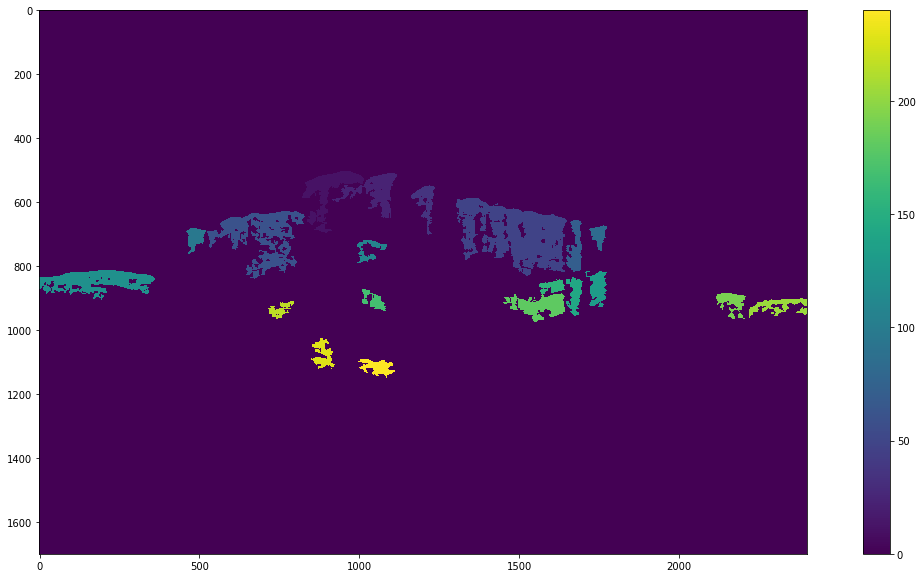

In [14]:
figure(figsize=(20,10))
imshow(newimgbigcomponents(ori_bin,indexoribin)[0])
colorbar()

# Interactive

In [15]:
def threshold(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]
    figure(figsize=(20,10))
    imshow(img)

interact(threshold, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.threshold(img, thr)>

In [16]:
def connected_components(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]  # ensure binary
    num_labels, labels = cv.connectedComponents(img)
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    #print (blank_ch)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    figure(figsize=(20,10))
    imshow(labeled_img)

interact(connected_components, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.connected_components(img, thr)>

# Finding edges

In [17]:
#finding upper edge 
from ConnectedComp import FindingUpperEdges

edges, upperlimitx, upperlimity = FindingUpperEdges(newimg, huenewimg)

column 0 upper edge at: 843 , with label: 153
column 1 upper edge at: 843 , with label: 153
column 2 upper edge at: 843 , with label: 153
column 3 upper edge at: 843 , with label: 153
column 4 upper edge at: 843 , with label: 153
column 5 upper edge at: 842 , with label: 153
column 6 upper edge at: 843 , with label: 153
column 7 upper edge at: 843 , with label: 153
column 8 upper edge at: 843 , with label: 153
column 9 upper edge at: 843 , with label: 153
column 10 upper edge at: 843 , with label: 153
column 11 upper edge at: 842 , with label: 153
column 12 upper edge at: 842 , with label: 153
column 13 upper edge at: 842 , with label: 153
column 14 upper edge at: 842 , with label: 153
column 15 upper edge at: 842 , with label: 153
column 16 upper edge at: 842 , with label: 153
column 17 upper edge at: 842 , with label: 153
column 18 upper edge at: 843 , with label: 153
column 19 upper edge at: 843 , with label: 153
column 20 upper edge at: 843 , with label: 153
column 21 upper edge at

column 188 upper edge at: 822 , with label: 153
column 189 upper edge at: 822 , with label: 153
column 190 upper edge at: 822 , with label: 153
column 191 upper edge at: 822 , with label: 153
column 192 upper edge at: 822 , with label: 153
column 193 upper edge at: 822 , with label: 153
column 194 upper edge at: 822 , with label: 153
column 195 upper edge at: 821 , with label: 153
column 196 upper edge at: 821 , with label: 153
column 197 upper edge at: 821 , with label: 153
column 198 upper edge at: 820 , with label: 153
column 199 upper edge at: 820 , with label: 153
column 200 upper edge at: 820 , with label: 153
column 201 upper edge at: 820 , with label: 153
column 202 upper edge at: 820 , with label: 153
column 203 upper edge at: 820 , with label: 153
column 204 upper edge at: 820 , with label: 153
column 205 upper edge at: 820 , with label: 153
column 206 upper edge at: 820 , with label: 153
column 207 upper edge at: 820 , with label: 153
column 208 upper edge at: 819 , with lab

column 460 upper edge at: 952 , with label: 153
column 461 upper edge at: 702 , with label: 51
column 461 upper edge at: 949 , with label: 153
column 462 upper edge at: 700 , with label: 51
column 462 upper edge at: 948 , with label: 153
column 463 upper edge at: 698 , with label: 51
column 464 upper edge at: 697 , with label: 51
column 465 upper edge at: 696 , with label: 51
column 466 upper edge at: 695 , with label: 51
column 467 upper edge at: 694 , with label: 51
column 468 upper edge at: 694 , with label: 51
column 469 upper edge at: 693 , with label: 51
column 470 upper edge at: 692 , with label: 51
column 471 upper edge at: 692 , with label: 51
column 472 upper edge at: 691 , with label: 51
column 473 upper edge at: 691 , with label: 51
column 474 upper edge at: 690 , with label: 51
column 475 upper edge at: 690 , with label: 51
column 476 upper edge at: 689 , with label: 51
column 477 upper edge at: 689 , with label: 51
column 478 upper edge at: 688 , with label: 51
column 479

column 756 upper edge at: 636 , with label: 51
column 757 upper edge at: 636 , with label: 51
column 758 upper edge at: 636 , with label: 51
column 759 upper edge at: 635 , with label: 51
column 760 upper edge at: 635 , with label: 51
column 761 upper edge at: 635 , with label: 51
column 762 upper edge at: 634 , with label: 51
column 763 upper edge at: 634 , with label: 51
column 764 upper edge at: 634 , with label: 51
column 765 upper edge at: 634 , with label: 51
column 766 upper edge at: 633 , with label: 51
column 767 upper edge at: 634 , with label: 51
column 768 upper edge at: 633 , with label: 51
column 769 upper edge at: 633 , with label: 51
column 770 upper edge at: 633 , with label: 51
column 771 upper edge at: 634 , with label: 51
column 772 upper edge at: 634 , with label: 51
column 773 upper edge at: 634 , with label: 51
column 774 upper edge at: 634 , with label: 51
column 775 upper edge at: 634 , with label: 51
column 776 upper edge at: 634 , with label: 51
column 777 up

column 1043 upper edge at: 529 , with label: 51
column 1044 upper edge at: 529 , with label: 51
column 1045 upper edge at: 528 , with label: 51
column 1046 upper edge at: 528 , with label: 51
column 1047 upper edge at: 528 , with label: 51
column 1048 upper edge at: 528 , with label: 51
column 1049 upper edge at: 527 , with label: 51
column 1050 upper edge at: 527 , with label: 51
column 1051 upper edge at: 527 , with label: 51
column 1052 upper edge at: 527 , with label: 51
column 1053 upper edge at: 527 , with label: 51
column 1054 upper edge at: 526 , with label: 51
column 1055 upper edge at: 526 , with label: 51
column 1056 upper edge at: 526 , with label: 51
column 1057 upper edge at: 526 , with label: 51
column 1058 upper edge at: 526 , with label: 51
column 1059 upper edge at: 526 , with label: 51
column 1060 upper edge at: 526 , with label: 51
column 1061 upper edge at: 526 , with label: 51
column 1062 upper edge at: 525 , with label: 51
column 1063 upper edge at: 525 , with la

column 1403 upper edge at: 618 , with label: 102
column 1404 upper edge at: 619 , with label: 102
column 1405 upper edge at: 620 , with label: 102
column 1406 upper edge at: 620 , with label: 102
column 1407 upper edge at: 620 , with label: 102
column 1408 upper edge at: 620 , with label: 102
column 1409 upper edge at: 619 , with label: 102
column 1410 upper edge at: 619 , with label: 102
column 1411 upper edge at: 619 , with label: 102
column 1412 upper edge at: 618 , with label: 102
column 1413 upper edge at: 618 , with label: 102
column 1414 upper edge at: 617 , with label: 102
column 1415 upper edge at: 617 , with label: 102
column 1416 upper edge at: 617 , with label: 102
column 1417 upper edge at: 617 , with label: 102
column 1418 upper edge at: 617 , with label: 102
column 1419 upper edge at: 617 , with label: 102
column 1420 upper edge at: 617 , with label: 102
column 1421 upper edge at: 617 , with label: 102
column 1422 upper edge at: 617 , with label: 102
column 1423 upper ed

column 1696 upper edge at: 678 , with label: 102
column 1697 upper edge at: 681 , with label: 102
column 1698 upper edge at: 683 , with label: 102
column 1699 upper edge at: 708 , with label: 102
column 1700 upper edge at: 708 , with label: 102
column 1701 upper edge at: 708 , with label: 102
column 1702 upper edge at: 708 , with label: 102
column 1703 upper edge at: 708 , with label: 102
column 1704 upper edge at: 709 , with label: 102
column 1705 upper edge at: 712 , with label: 102
column 1706 upper edge at: 714 , with label: 102
column 1707 upper edge at: 717 , with label: 102
column 1708 upper edge at: 720 , with label: 102
column 1709 upper edge at: 720 , with label: 102
column 1710 upper edge at: 720 , with label: 102
column 1711 upper edge at: 720 , with label: 102
column 1712 upper edge at: 720 , with label: 102
column 1713 upper edge at: 718 , with label: 102
column 1714 upper edge at: 718 , with label: 102
column 1715 upper edge at: 718 , with label: 102
column 1716 upper ed

column 2254 upper edge at: 919 , with label: 204
column 2255 upper edge at: 919 , with label: 204
column 2256 upper edge at: 920 , with label: 204
column 2257 upper edge at: 920 , with label: 204
column 2258 upper edge at: 920 , with label: 204
column 2259 upper edge at: 919 , with label: 204
column 2260 upper edge at: 919 , with label: 204
column 2261 upper edge at: 918 , with label: 204
column 2262 upper edge at: 918 , with label: 204
column 2263 upper edge at: 918 , with label: 204
column 2264 upper edge at: 917 , with label: 204
column 2265 upper edge at: 918 , with label: 204
column 2266 upper edge at: 918 , with label: 204
column 2267 upper edge at: 917 , with label: 204
column 2268 upper edge at: 917 , with label: 204
column 2269 upper edge at: 916 , with label: 204
column 2270 upper edge at: 916 , with label: 204
column 2271 upper edge at: 916 , with label: 204
column 2272 upper edge at: 916 , with label: 204
column 2273 upper edge at: 916 , with label: 204
column 2274 upper ed

In [18]:
#finding lower edge 
from ConnectedComp import FindingLowerEdges
            
edges, lowerlimitx, lowerlimity = FindingLowerEdges(newimg, huenewimg, edges)

column 0 lower edge at: 826 (not reversed value), right reversed value: 874 , with label: 153
column 1 lower edge at: 823 (not reversed value), right reversed value: 877 , with label: 153
column 2 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 3 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 4 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 5 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 6 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 7 lower edge at: 807 (not reversed value), right reversed value: 893 , with label: 153
column 8 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 9 lower edge at: 806 (not reversed value), right reversed value: 894 , with label: 153
column 10 lower edge at: 807 (not reversed value), right rev

column 89 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 90 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 91 lower edge at: 799 (not reversed value), right reversed value: 901 , with label: 153
column 92 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 93 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 94 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 95 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 96 lower edge at: 801 (not reversed value), right reversed value: 899 , with label: 153
column 97 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 98 lower edge at: 801 (not reversed value), right reversed value: 899 , with label: 153
column 99 lower edge at: 803 (not reversed value),

column 207 lower edge at: 792 (not reversed value), right reversed value: 908 , with label: 153
column 208 lower edge at: 793 (not reversed value), right reversed value: 907 , with label: 153
column 209 lower edge at: 793 (not reversed value), right reversed value: 907 , with label: 153
column 210 lower edge at: 787 (not reversed value), right reversed value: 913 , with label: 153
column 211 lower edge at: 784 (not reversed value), right reversed value: 916 , with label: 153
column 212 lower edge at: 786 (not reversed value), right reversed value: 914 , with label: 153
column 213 lower edge at: 790 (not reversed value), right reversed value: 910 , with label: 153
column 214 lower edge at: 786 (not reversed value), right reversed value: 914 , with label: 153
column 215 lower edge at: 784 (not reversed value), right reversed value: 916 , with label: 153
column 216 lower edge at: 789 (not reversed value), right reversed value: 911 , with label: 153
column 217 lower edge at: 793 (not rever

column 311 lower edge at: 795 (not reversed value), right reversed value: 905 , with label: 153
column 312 lower edge at: 796 (not reversed value), right reversed value: 904 , with label: 153
column 313 lower edge at: 792 (not reversed value), right reversed value: 908 , with label: 153
column 314 lower edge at: 791 (not reversed value), right reversed value: 909 , with label: 153
column 315 lower edge at: 788 (not reversed value), right reversed value: 912 , with label: 153
column 316 lower edge at: 790 (not reversed value), right reversed value: 910 , with label: 153
column 317 lower edge at: 790 (not reversed value), right reversed value: 910 , with label: 153
column 318 lower edge at: 788 (not reversed value), right reversed value: 912 , with label: 153
column 319 lower edge at: 789 (not reversed value), right reversed value: 911 , with label: 153
column 320 lower edge at: 787 (not reversed value), right reversed value: 913 , with label: 153
column 321 lower edge at: 787 (not rever

column 401 lower edge at: 737 (not reversed value), right reversed value: 963 , with label: 153
column 402 lower edge at: 737 (not reversed value), right reversed value: 963 , with label: 153
column 403 lower edge at: 738 (not reversed value), right reversed value: 962 , with label: 153
column 404 lower edge at: 737 (not reversed value), right reversed value: 963 , with label: 153
column 405 lower edge at: 738 (not reversed value), right reversed value: 962 , with label: 153
column 406 lower edge at: 735 (not reversed value), right reversed value: 965 , with label: 153
column 407 lower edge at: 735 (not reversed value), right reversed value: 965 , with label: 153
column 408 lower edge at: 735 (not reversed value), right reversed value: 965 , with label: 153
column 409 lower edge at: 729 (not reversed value), right reversed value: 971 , with label: 153
column 410 lower edge at: 730 (not reversed value), right reversed value: 970 , with label: 153
column 411 lower edge at: 729 (not rever

column 484 lower edge at: 966 (not reversed value), right reversed value: 734 , with label: 51
column 485 lower edge at: 966 (not reversed value), right reversed value: 734 , with label: 51
column 486 lower edge at: 966 (not reversed value), right reversed value: 734 , with label: 51
column 487 lower edge at: 967 (not reversed value), right reversed value: 733 , with label: 51
column 488 lower edge at: 968 (not reversed value), right reversed value: 732 , with label: 51
column 489 lower edge at: 969 (not reversed value), right reversed value: 731 , with label: 51
column 490 lower edge at: 970 (not reversed value), right reversed value: 730 , with label: 51
column 491 lower edge at: 971 (not reversed value), right reversed value: 729 , with label: 51
column 492 lower edge at: 971 (not reversed value), right reversed value: 729 , with label: 51
column 493 lower edge at: 961 (not reversed value), right reversed value: 739 , with label: 51
column 494 lower edge at: 959 (not reversed value)

column 594 lower edge at: 865 (not reversed value), right reversed value: 835 , with label: 51
column 595 lower edge at: 856 (not reversed value), right reversed value: 844 , with label: 51
column 596 lower edge at: 854 (not reversed value), right reversed value: 846 , with label: 51
column 597 lower edge at: 853 (not reversed value), right reversed value: 847 , with label: 51
column 598 lower edge at: 852 (not reversed value), right reversed value: 848 , with label: 51
column 599 lower edge at: 852 (not reversed value), right reversed value: 848 , with label: 51
column 600 lower edge at: 852 (not reversed value), right reversed value: 848 , with label: 51
column 601 lower edge at: 852 (not reversed value), right reversed value: 848 , with label: 51
column 602 lower edge at: 852 (not reversed value), right reversed value: 848 , with label: 51
column 603 lower edge at: 851 (not reversed value), right reversed value: 849 , with label: 51
column 604 lower edge at: 847 (not reversed value)

column 705 lower edge at: 945 (not reversed value), right reversed value: 755 , with label: 51
column 706 lower edge at: 945 (not reversed value), right reversed value: 755 , with label: 51
column 707 lower edge at: 944 (not reversed value), right reversed value: 756 , with label: 51
column 708 lower edge at: 945 (not reversed value), right reversed value: 755 , with label: 51
column 709 lower edge at: 945 (not reversed value), right reversed value: 755 , with label: 51
column 710 lower edge at: 946 (not reversed value), right reversed value: 754 , with label: 51
column 711 lower edge at: 946 (not reversed value), right reversed value: 754 , with label: 51
column 712 lower edge at: 954 (not reversed value), right reversed value: 746 , with label: 51
column 713 lower edge at: 955 (not reversed value), right reversed value: 745 , with label: 51
column 714 lower edge at: 953 (not reversed value), right reversed value: 747 , with label: 51
column 715 lower edge at: 946 (not reversed value)

column 832 lower edge at: 1126 (not reversed value), right reversed value: 574 , with label: 51
column 833 lower edge at: 1126 (not reversed value), right reversed value: 574 , with label: 51
column 834 lower edge at: 1127 (not reversed value), right reversed value: 573 , with label: 51
column 835 lower edge at: 1127 (not reversed value), right reversed value: 573 , with label: 51
column 836 lower edge at: 1128 (not reversed value), right reversed value: 572 , with label: 51
column 837 lower edge at: 1128 (not reversed value), right reversed value: 572 , with label: 51
column 838 lower edge at: 1128 (not reversed value), right reversed value: 572 , with label: 51
column 839 lower edge at: 1128 (not reversed value), right reversed value: 572 , with label: 51
column 840 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 841 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 842 lower edge at: 1129 (not reve

column 933 lower edge at: 1157 (not reversed value), right reversed value: 543 , with label: 51
column 934 lower edge at: 1158 (not reversed value), right reversed value: 542 , with label: 51
column 935 lower edge at: 1158 (not reversed value), right reversed value: 542 , with label: 51
column 936 lower edge at: 1159 (not reversed value), right reversed value: 541 , with label: 51
column 937 lower edge at: 1160 (not reversed value), right reversed value: 540 , with label: 51
column 938 lower edge at: 1162 (not reversed value), right reversed value: 538 , with label: 51
column 939 lower edge at: 1163 (not reversed value), right reversed value: 537 , with label: 51
column 940 lower edge at: 1164 (not reversed value), right reversed value: 536 , with label: 51
column 941 lower edge at: 1164 (not reversed value), right reversed value: 536 , with label: 51
column 942 lower edge at: 1164 (not reversed value), right reversed value: 536 , with label: 51
column 943 lower edge at: 1118 (not reve

column 1026 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 51
column 1027 lower edge at: 1065 (not reversed value), right reversed value: 635 , with label: 51
column 1028 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 51
column 1029 lower edge at: 1062 (not reversed value), right reversed value: 638 , with label: 51
column 1030 lower edge at: 1062 (not reversed value), right reversed value: 638 , with label: 51
column 1031 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 51
column 1032 lower edge at: 1060 (not reversed value), right reversed value: 640 , with label: 51
column 1033 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 51
column 1034 lower edge at: 1048 (not reversed value), right reversed value: 652 , with label: 51
column 1035 lower edge at: 1047 (not reversed value), right reversed value: 653 , with label: 51
column 1036 lower edge at: 104

column 1111 lower edge at: 1162 (not reversed value), right reversed value: 538 , with label: 51
column 1112 lower edge at: 1164 (not reversed value), right reversed value: 536 , with label: 51
column 1113 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1114 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1115 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1116 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1117 lower edge at: 1166 (not reversed value), right reversed value: 534 , with label: 51
column 1118 lower edge at: 1166 (not reversed value), right reversed value: 534 , with label: 51
column 1119 lower edge at: 1166 (not reversed value), right reversed value: 534 , with label: 51
column 1244 lower edge at: 1060 (not reversed value), right reversed value: 640 , with label: 102
column 1245 lower edge at: 10

column 1357 lower edge at: 1066 (not reversed value), right reversed value: 634 , with label: 102
column 1358 lower edge at: 1066 (not reversed value), right reversed value: 634 , with label: 102
column 1359 lower edge at: 1066 (not reversed value), right reversed value: 634 , with label: 102
column 1360 lower edge at: 1066 (not reversed value), right reversed value: 634 , with label: 102
column 1361 lower edge at: 1067 (not reversed value), right reversed value: 633 , with label: 102
column 1362 lower edge at: 1067 (not reversed value), right reversed value: 633 , with label: 102
column 1363 lower edge at: 1067 (not reversed value), right reversed value: 633 , with label: 102
column 1364 lower edge at: 1067 (not reversed value), right reversed value: 633 , with label: 102
column 1365 lower edge at: 1067 (not reversed value), right reversed value: 633 , with label: 102
column 1366 lower edge at: 1067 (not reversed value), right reversed value: 633 , with label: 102
column 1367 lower ed

column 1458 lower edge at: 954 (not reversed value), right reversed value: 746 , with label: 102
column 1459 lower edge at: 952 (not reversed value), right reversed value: 748 , with label: 102
column 1460 lower edge at: 952 (not reversed value), right reversed value: 748 , with label: 102
column 1461 lower edge at: 953 (not reversed value), right reversed value: 747 , with label: 102
column 1462 lower edge at: 952 (not reversed value), right reversed value: 748 , with label: 102
column 1463 lower edge at: 952 (not reversed value), right reversed value: 748 , with label: 102
column 1464 lower edge at: 951 (not reversed value), right reversed value: 749 , with label: 102
column 1465 lower edge at: 947 (not reversed value), right reversed value: 753 , with label: 102
column 1466 lower edge at: 944 (not reversed value), right reversed value: 756 , with label: 102
column 1467 lower edge at: 942 (not reversed value), right reversed value: 758 , with label: 102
column 1468 lower edge at: 942

column 1556 lower edge at: 921 (not reversed value), right reversed value: 779 , with label: 102
column 1557 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1558 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1559 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1560 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1561 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1562 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1563 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1564 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1565 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1566 lower edge at: 920

column 1651 lower edge at: 929 (not reversed value), right reversed value: 771 , with label: 102
column 1652 lower edge at: 928 (not reversed value), right reversed value: 772 , with label: 102
column 1653 lower edge at: 927 (not reversed value), right reversed value: 773 , with label: 102
column 1654 lower edge at: 926 (not reversed value), right reversed value: 774 , with label: 102
column 1655 lower edge at: 925 (not reversed value), right reversed value: 775 , with label: 102
column 1656 lower edge at: 924 (not reversed value), right reversed value: 776 , with label: 102
column 1657 lower edge at: 923 (not reversed value), right reversed value: 777 , with label: 102
column 1658 lower edge at: 922 (not reversed value), right reversed value: 778 , with label: 102
column 1659 lower edge at: 921 (not reversed value), right reversed value: 779 , with label: 102
column 1660 lower edge at: 920 (not reversed value), right reversed value: 780 , with label: 102
column 1661 lower edge at: 919

column 1743 lower edge at: 907 (not reversed value), right reversed value: 793 , with label: 102
column 1744 lower edge at: 908 (not reversed value), right reversed value: 792 , with label: 102
column 1745 lower edge at: 908 (not reversed value), right reversed value: 792 , with label: 102
column 1746 lower edge at: 908 (not reversed value), right reversed value: 792 , with label: 102
column 1747 lower edge at: 909 (not reversed value), right reversed value: 791 , with label: 102
column 1748 lower edge at: 909 (not reversed value), right reversed value: 791 , with label: 102
column 1749 lower edge at: 909 (not reversed value), right reversed value: 791 , with label: 102
column 1750 lower edge at: 910 (not reversed value), right reversed value: 790 , with label: 102
column 1751 lower edge at: 910 (not reversed value), right reversed value: 790 , with label: 102
column 1752 lower edge at: 911 (not reversed value), right reversed value: 789 , with label: 102
column 1753 lower edge at: 912

column 2151 lower edge at: 758 (not reversed value), right reversed value: 942 , with label: 204
column 2152 lower edge at: 748 (not reversed value), right reversed value: 952 , with label: 204
column 2153 lower edge at: 748 (not reversed value), right reversed value: 952 , with label: 204
column 2154 lower edge at: 746 (not reversed value), right reversed value: 954 , with label: 204
column 2155 lower edge at: 746 (not reversed value), right reversed value: 954 , with label: 204
column 2156 lower edge at: 746 (not reversed value), right reversed value: 954 , with label: 204
column 2157 lower edge at: 746 (not reversed value), right reversed value: 954 , with label: 204
column 2158 lower edge at: 745 (not reversed value), right reversed value: 955 , with label: 204
column 2159 lower edge at: 745 (not reversed value), right reversed value: 955 , with label: 204
column 2160 lower edge at: 746 (not reversed value), right reversed value: 954 , with label: 204
column 2161 lower edge at: 746

column 2263 lower edge at: 750 (not reversed value), right reversed value: 950 , with label: 204
column 2264 lower edge at: 752 (not reversed value), right reversed value: 948 , with label: 204
column 2265 lower edge at: 752 (not reversed value), right reversed value: 948 , with label: 204
column 2266 lower edge at: 752 (not reversed value), right reversed value: 948 , with label: 204
column 2267 lower edge at: 749 (not reversed value), right reversed value: 951 , with label: 204
column 2268 lower edge at: 740 (not reversed value), right reversed value: 960 , with label: 204
column 2269 lower edge at: 740 (not reversed value), right reversed value: 960 , with label: 204
column 2270 lower edge at: 740 (not reversed value), right reversed value: 960 , with label: 204
column 2271 lower edge at: 741 (not reversed value), right reversed value: 959 , with label: 204
column 2272 lower edge at: 745 (not reversed value), right reversed value: 955 , with label: 204
column 2273 lower edge at: 754

column 2370 lower edge at: 761 (not reversed value), right reversed value: 939 , with label: 204
column 2371 lower edge at: 760 (not reversed value), right reversed value: 940 , with label: 204
column 2372 lower edge at: 760 (not reversed value), right reversed value: 940 , with label: 204
column 2373 lower edge at: 759 (not reversed value), right reversed value: 941 , with label: 204
column 2374 lower edge at: 760 (not reversed value), right reversed value: 940 , with label: 204
column 2375 lower edge at: 760 (not reversed value), right reversed value: 940 , with label: 204
column 2376 lower edge at: 761 (not reversed value), right reversed value: 939 , with label: 204
column 2377 lower edge at: 762 (not reversed value), right reversed value: 938 , with label: 204
column 2378 lower edge at: 762 (not reversed value), right reversed value: 938 , with label: 204
column 2379 lower edge at: 762 (not reversed value), right reversed value: 938 , with label: 204
column 2380 lower edge at: 762

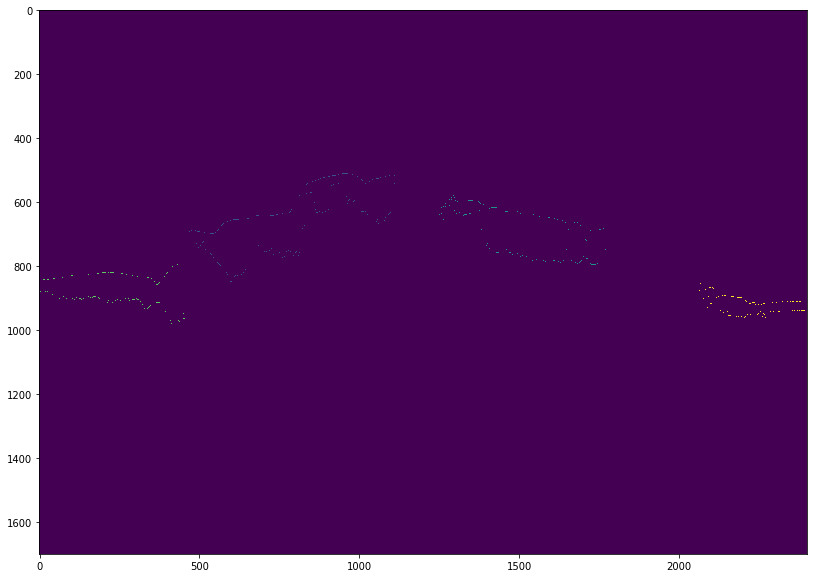

In [19]:
figure(figsize=(20,10))
imshow(edges)

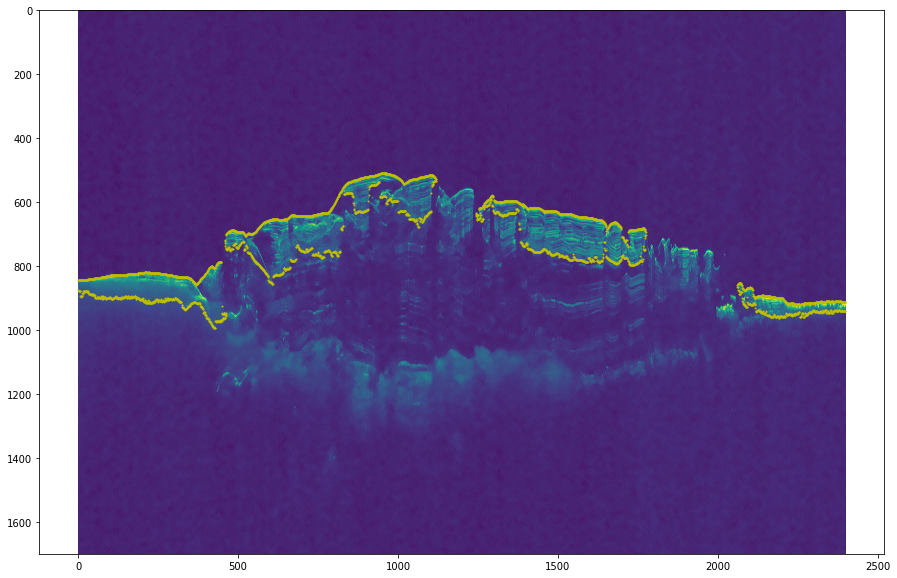

In [20]:
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
#plt.savefig('tshirtPT.png', dpi=1600)

# Thickness

[   0    1    2 ... 2397 2398 2399]
[31 34 36 ... 28 28 27]


Text(0, 0.5, 'Connected Component Thickness [px]')

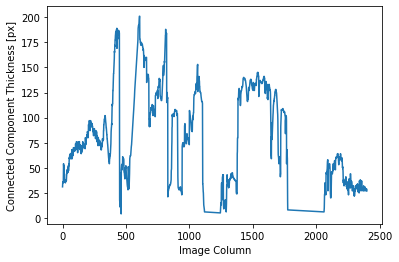

In [21]:
from ConnectedComp import Thickness

deltacolumn, delta = Thickness(upperlimity, upperlimitx, lowerlimity, lowerlimitx)
print(deltacolumn)
print(delta)

plt.plot(deltacolumn, delta)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [px]')

In [22]:
deltalist = delta.tolist()
print(deltalist.index(4))

466


In [23]:
from ConnectedComp import Conversion
#This function has 3 possible argument: a thickness values array in pixel for each column of the selected connected components
#Data type specification: automatically US data (important for pixel to second conversion), specify "ITA" for italian data
#Value for dieletric const. : automatically eps = 3.15 from Putzig et al. 2009, tipical of pure water ice

deltasec, deltakm, deltam = Conversion(delta)

Thickness [sec] [1.1625e-06 1.2750e-06 1.3500e-06 ... 1.0500e-06 1.0500e-06 1.0125e-06]
Maximum thickness [microsec] 7.5375
Thickness [m]: [ 98.18121267 107.68262035 114.01689214 ...  88.67980499  88.67980499
  85.5126691 ]
Maximum thickness [m]: 636.5943144282279
Average thickness [m]: 269.92570504271316


Text(0, 0.5, 'Connected Component Thickness [m]')

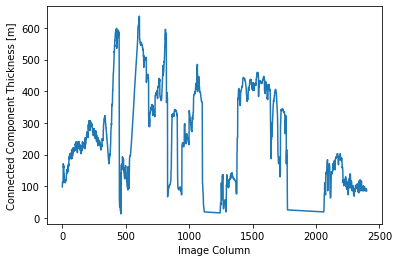

In [24]:
plt.plot(deltacolumn, deltam)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [m]')

# Column selection and power spectrum analysis

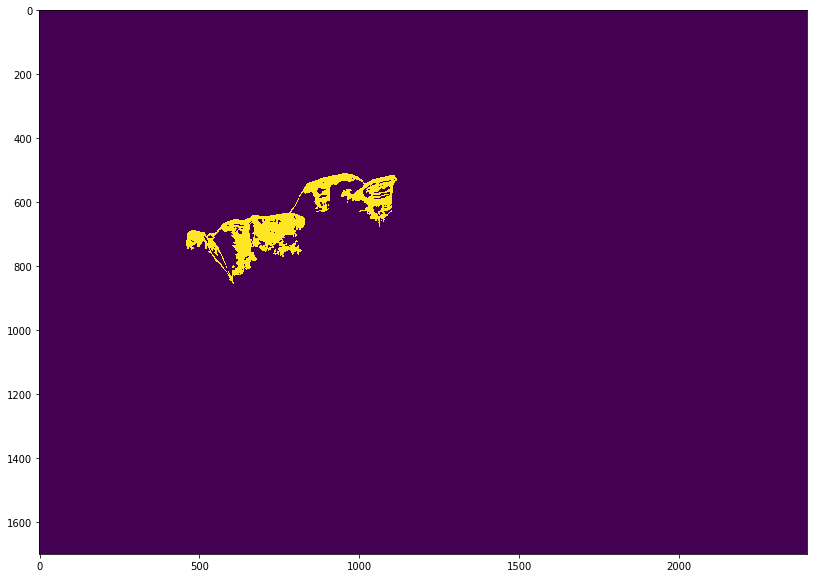

In [26]:
#isolation of single components into different array images

components = []
for j in huenewimg[1:]:
    components.append(np.where((newimg==j), 1, 0))

figure(figsize=(20,10))
imshow(components[0])

In [27]:
#finding limits of different components

firstlimitsy = np.zeros(len(components))
lastlimitsy = np.zeros(len(components))
firstlimitsx = np.zeros(len(components))
lastlimitsx = np.zeros(len(components))

for i in range(len(components)):
    print ('COMPONENT', i, ':')
    rightcol = []
    rightraw = []
    for j in range(components[i].shape[1]):
        column = components[i][:,j]
        colist = column.tolist()
        try:
            print ('column', j, 'equal to 1 at y coordinate:', colist.index(1))
            rightcol.append(j)
            rightraw.append(colist.index(1))
            #print (rightcol)
        except ValueError:
            pass
    firstlimitsx[i] = min(rightcol)
    lastlimitsx[i] = max(rightcol)
    firstlimitsy[i] = rightraw[0]
    lastlimitsy[i] = rightraw[-1]

COMPONENT 0 :
column 459 equal to 1 at y coordinate: 720
column 460 equal to 1 at y coordinate: 718
column 461 equal to 1 at y coordinate: 702
column 462 equal to 1 at y coordinate: 700
column 463 equal to 1 at y coordinate: 698
column 464 equal to 1 at y coordinate: 697
column 465 equal to 1 at y coordinate: 696
column 466 equal to 1 at y coordinate: 695
column 467 equal to 1 at y coordinate: 694
column 468 equal to 1 at y coordinate: 694
column 469 equal to 1 at y coordinate: 693
column 470 equal to 1 at y coordinate: 692
column 471 equal to 1 at y coordinate: 692
column 472 equal to 1 at y coordinate: 691
column 473 equal to 1 at y coordinate: 691
column 474 equal to 1 at y coordinate: 690
column 475 equal to 1 at y coordinate: 690
column 476 equal to 1 at y coordinate: 689
column 477 equal to 1 at y coordinate: 689
column 478 equal to 1 at y coordinate: 688
column 479 equal to 1 at y coordinate: 688
column 480 equal to 1 at y coordinate: 688
column 481 equal to 1 at y coordinate: 6

column 734 equal to 1 at y coordinate: 641
column 735 equal to 1 at y coordinate: 641
column 736 equal to 1 at y coordinate: 641
column 737 equal to 1 at y coordinate: 640
column 738 equal to 1 at y coordinate: 640
column 739 equal to 1 at y coordinate: 640
column 740 equal to 1 at y coordinate: 639
column 741 equal to 1 at y coordinate: 639
column 742 equal to 1 at y coordinate: 639
column 743 equal to 1 at y coordinate: 639
column 744 equal to 1 at y coordinate: 639
column 745 equal to 1 at y coordinate: 639
column 746 equal to 1 at y coordinate: 639
column 747 equal to 1 at y coordinate: 638
column 748 equal to 1 at y coordinate: 638
column 749 equal to 1 at y coordinate: 638
column 750 equal to 1 at y coordinate: 638
column 751 equal to 1 at y coordinate: 638
column 752 equal to 1 at y coordinate: 637
column 753 equal to 1 at y coordinate: 637
column 754 equal to 1 at y coordinate: 637
column 755 equal to 1 at y coordinate: 637
column 756 equal to 1 at y coordinate: 636
column 757 

column 1019 equal to 1 at y coordinate: 542
column 1020 equal to 1 at y coordinate: 542
column 1021 equal to 1 at y coordinate: 541
column 1022 equal to 1 at y coordinate: 541
column 1023 equal to 1 at y coordinate: 540
column 1024 equal to 1 at y coordinate: 539
column 1025 equal to 1 at y coordinate: 539
column 1026 equal to 1 at y coordinate: 538
column 1027 equal to 1 at y coordinate: 537
column 1028 equal to 1 at y coordinate: 537
column 1029 equal to 1 at y coordinate: 536
column 1030 equal to 1 at y coordinate: 536
column 1031 equal to 1 at y coordinate: 535
column 1032 equal to 1 at y coordinate: 535
column 1033 equal to 1 at y coordinate: 534
column 1034 equal to 1 at y coordinate: 534
column 1035 equal to 1 at y coordinate: 533
column 1036 equal to 1 at y coordinate: 532
column 1037 equal to 1 at y coordinate: 531
column 1038 equal to 1 at y coordinate: 531
column 1039 equal to 1 at y coordinate: 530
column 1040 equal to 1 at y coordinate: 530
column 1041 equal to 1 at y coor

column 1462 equal to 1 at y coordinate: 629
column 1463 equal to 1 at y coordinate: 629
column 1464 equal to 1 at y coordinate: 629
column 1465 equal to 1 at y coordinate: 628
column 1466 equal to 1 at y coordinate: 628
column 1467 equal to 1 at y coordinate: 628
column 1468 equal to 1 at y coordinate: 628
column 1469 equal to 1 at y coordinate: 628
column 1470 equal to 1 at y coordinate: 628
column 1471 equal to 1 at y coordinate: 627
column 1472 equal to 1 at y coordinate: 627
column 1473 equal to 1 at y coordinate: 627
column 1474 equal to 1 at y coordinate: 627
column 1475 equal to 1 at y coordinate: 627
column 1476 equal to 1 at y coordinate: 627
column 1477 equal to 1 at y coordinate: 627
column 1478 equal to 1 at y coordinate: 627
column 1479 equal to 1 at y coordinate: 627
column 1480 equal to 1 at y coordinate: 627
column 1481 equal to 1 at y coordinate: 627
column 1482 equal to 1 at y coordinate: 627
column 1483 equal to 1 at y coordinate: 627
column 1484 equal to 1 at y coor

column 1710 equal to 1 at y coordinate: 720
column 1711 equal to 1 at y coordinate: 720
column 1712 equal to 1 at y coordinate: 720
column 1713 equal to 1 at y coordinate: 718
column 1714 equal to 1 at y coordinate: 718
column 1715 equal to 1 at y coordinate: 718
column 1716 equal to 1 at y coordinate: 732
column 1717 equal to 1 at y coordinate: 734
column 1718 equal to 1 at y coordinate: 737
column 1719 equal to 1 at y coordinate: 739
column 1720 equal to 1 at y coordinate: 693
column 1721 equal to 1 at y coordinate: 691
column 1722 equal to 1 at y coordinate: 689
column 1723 equal to 1 at y coordinate: 689
column 1724 equal to 1 at y coordinate: 688
column 1725 equal to 1 at y coordinate: 687
column 1726 equal to 1 at y coordinate: 688
column 1727 equal to 1 at y coordinate: 688
column 1728 equal to 1 at y coordinate: 687
column 1729 equal to 1 at y coordinate: 687
column 1730 equal to 1 at y coordinate: 687
column 1731 equal to 1 at y coordinate: 687
column 1732 equal to 1 at y coor

column 346 equal to 1 at y coordinate: 837
column 347 equal to 1 at y coordinate: 837
column 348 equal to 1 at y coordinate: 838
column 349 equal to 1 at y coordinate: 838
column 350 equal to 1 at y coordinate: 838
column 351 equal to 1 at y coordinate: 839
column 352 equal to 1 at y coordinate: 839
column 353 equal to 1 at y coordinate: 840
column 354 equal to 1 at y coordinate: 841
column 355 equal to 1 at y coordinate: 842
column 356 equal to 1 at y coordinate: 843
column 357 equal to 1 at y coordinate: 844
column 358 equal to 1 at y coordinate: 845
column 359 equal to 1 at y coordinate: 847
column 360 equal to 1 at y coordinate: 848
column 361 equal to 1 at y coordinate: 849
column 362 equal to 1 at y coordinate: 850
column 363 equal to 1 at y coordinate: 851
column 364 equal to 1 at y coordinate: 853
column 365 equal to 1 at y coordinate: 854
column 366 equal to 1 at y coordinate: 856
column 367 equal to 1 at y coordinate: 857
column 368 equal to 1 at y coordinate: 859
column 369 

column 2374 equal to 1 at y coordinate: 909
column 2375 equal to 1 at y coordinate: 909
column 2376 equal to 1 at y coordinate: 910
column 2377 equal to 1 at y coordinate: 911
column 2378 equal to 1 at y coordinate: 911
column 2379 equal to 1 at y coordinate: 910
column 2380 equal to 1 at y coordinate: 909
column 2381 equal to 1 at y coordinate: 908
column 2382 equal to 1 at y coordinate: 908
column 2383 equal to 1 at y coordinate: 908
column 2384 equal to 1 at y coordinate: 909
column 2385 equal to 1 at y coordinate: 911
column 2386 equal to 1 at y coordinate: 912
column 2387 equal to 1 at y coordinate: 911
column 2388 equal to 1 at y coordinate: 911
column 2389 equal to 1 at y coordinate: 911
column 2390 equal to 1 at y coordinate: 911
column 2391 equal to 1 at y coordinate: 912
column 2392 equal to 1 at y coordinate: 912
column 2393 equal to 1 at y coordinate: 912
column 2394 equal to 1 at y coordinate: 912
column 2395 equal to 1 at y coordinate: 912
column 2396 equal to 1 at y coor

In [28]:
print('x coordinate of components initial points:', firstlimitsx)
print('y coordinate of components initial points:', firstlimitsy)

print('x coordinate of components last points:', lastlimitsx)
print('y coordinate of components last points:', lastlimitsy)

x coordinate of components initial points: [ 459. 1244.    0. 2061.]
y coordinate of components initial points: [720. 635. 843. 858.]
x coordinate of components last points: [1119. 1775.  462. 2399.]
y coordinate of components last points: [528. 694. 948. 913.]


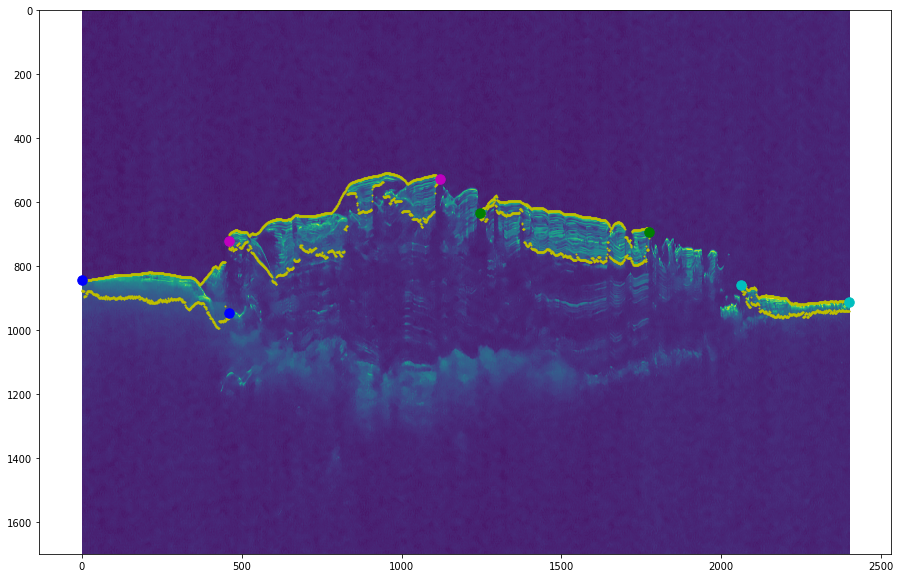

In [29]:
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)

plt.scatter(firstlimitsx[0],firstlimitsy[0], c='m', s=90)
plt.scatter(lastlimitsx[0],lastlimitsy[0], c='m', s=90)

plt.scatter(firstlimitsx[1],firstlimitsy[1], c='g', s=90)
plt.scatter(lastlimitsx[1],lastlimitsy[1], c='g', s=90)

plt.scatter(firstlimitsx[2],firstlimitsy[2], c='b', s=90)
plt.scatter(lastlimitsx[2],lastlimitsy[2], c='b', s=90)

plt.scatter(firstlimitsx[3],firstlimitsy[3], c='c', s=90)
plt.scatter(lastlimitsx[3],lastlimitsy[3], c='c', s=90)

459


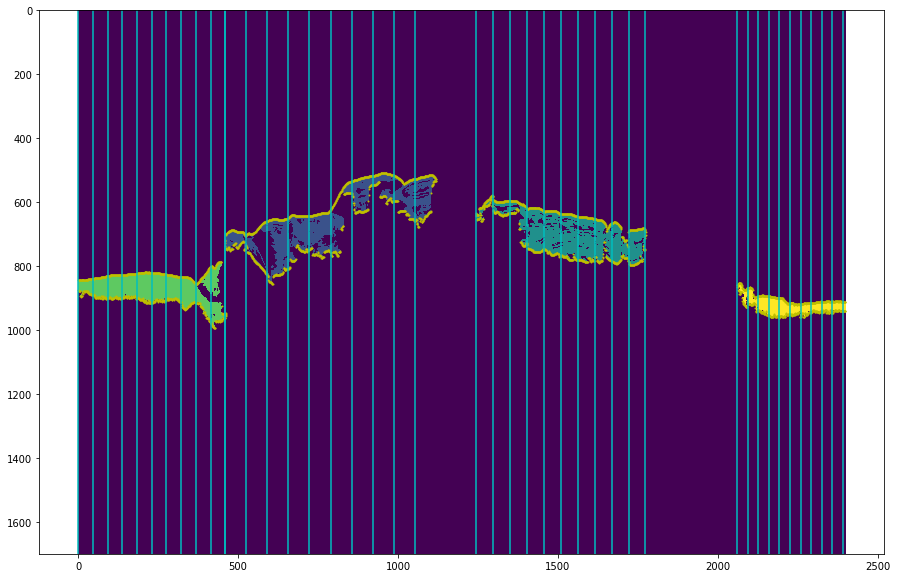

In [30]:
#picking a number of column equispatiated along each component
columnsID = []

for i in range(len(components)):
    columnsID.append(range(int(firstlimitsx[i]), int(lastlimitsx[i]), int((lastlimitsx[i]-firstlimitsx[i])/10.0))) 
    #selection of ten columns for each component
    
print(columnsID[0][0])
    
figure(figsize=(20,10))
imshow(newimg)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)

for i in range(len(columnsID)):
    for j in range(len(columnsID[i])):
        plt.axvline(columnsID[i][j], c='c')

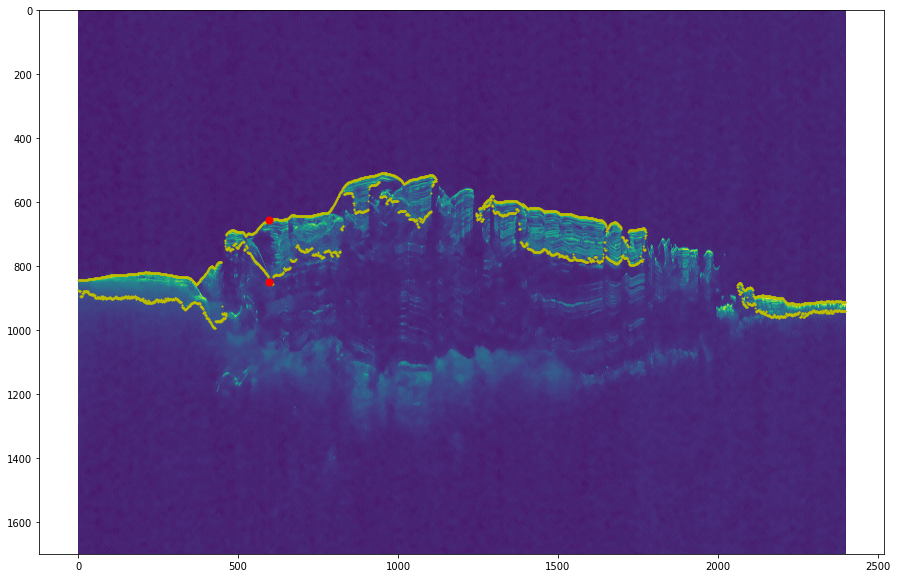

In [31]:
#first attempt, red dots indicate the initial column (randomly chosen)
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[602],lowerlimitx[602], c='r', s=50)
plt.scatter(upperlimity[602],upperlimitx[602], c='r', s=50)

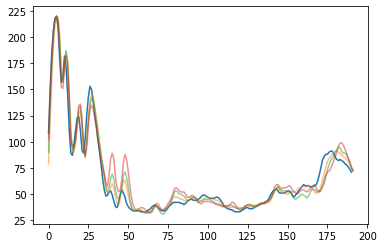

In [32]:
a = imgInTiny[upperlimitx[602]:lowerlimitx[602],upperlimity[602]]
plot(a)
b = imgInTiny[upperlimitx[603]:lowerlimitx[603],upperlimity[603]]
plot(b,alpha=0.5)
c = imgInTiny[upperlimitx[604]:lowerlimitx[604],upperlimity[604]]
plot(c,alpha=0.5)
d = imgInTiny[upperlimitx[605]:lowerlimitx[605],upperlimity[605]]
plot(d,alpha=0.5)

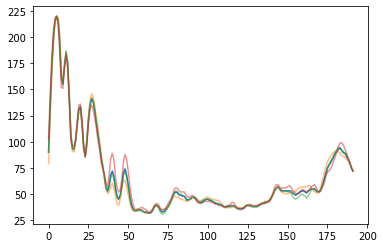

In [33]:
#case in which the selected columns have the same lenght and initial and final point (only b, c, d)

new = np.zeros_like(b) 
for i in range(len(b)):
    new[i] = (np.uint16(b[i])+np.uint16(c[i])+np.uint16(d[i]))/3

    
plot(new)
plot(b,alpha=0.5)
plot(c,alpha=0.5)
plot(d,alpha=0.5)

C:\Users\Alfonso Lovati\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 192, using nperseg = 192
  .format(nperseg, input_length))


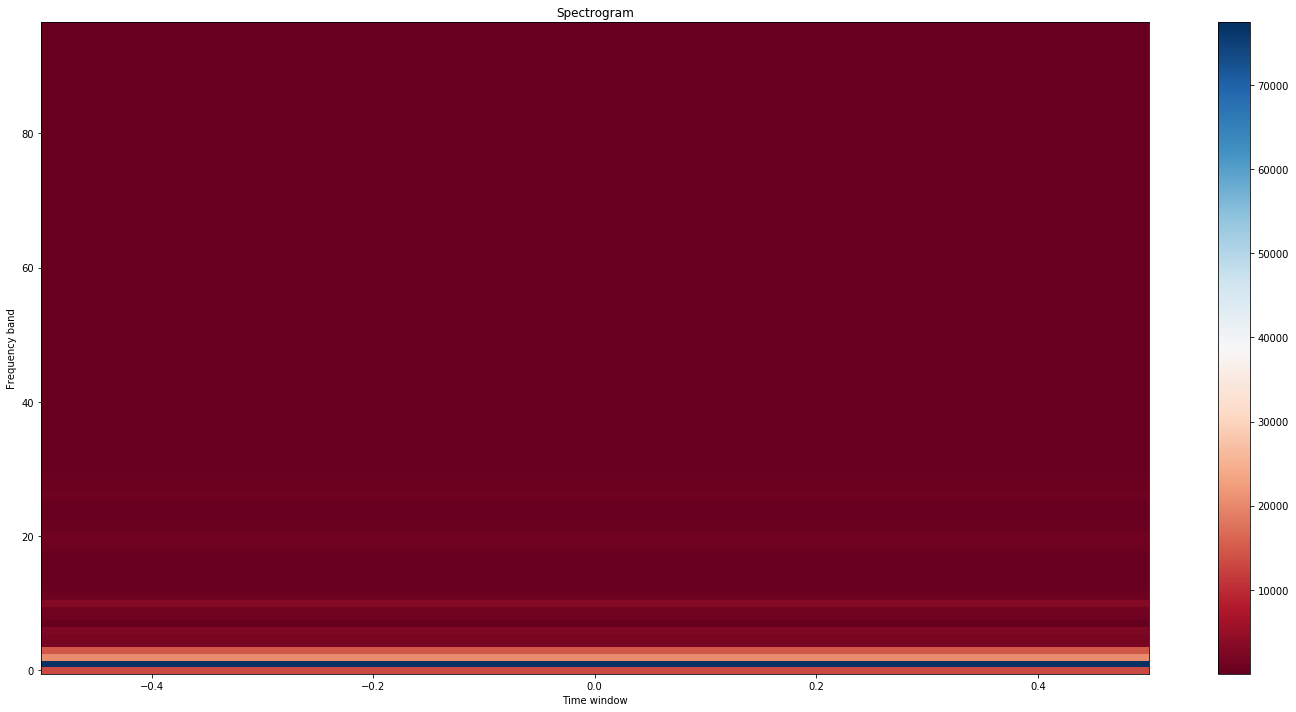

In [34]:
from scipy import signal
#T = 0.0375*10**(-6)
#fs = 1/T

freqs1, times, spectrogram = signal.spectrogram(new) #, fs)

plt.figure(figsize=(20, 10))
plt.imshow(spectrogram, aspect='auto', cmap='RdBu', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.colorbar()
plt.tight_layout()

In [35]:
print (1/freqs1[1:])
print (np.mean(freqs1))
print (np.std(freqs1))

[192.          96.          64.          48.          38.4
  32.          27.42857143  24.          21.33333333  19.2
  17.45454545  16.          14.76923077  13.71428571  12.8
  12.          11.29411765  10.66666667  10.10526316   9.6
   9.14285714   8.72727273   8.34782609   8.           7.68
   7.38461538   7.11111111   6.85714286   6.62068966   6.4
   6.19354839   6.           5.81818182   5.64705882   5.48571429
   5.33333333   5.18918919   5.05263158   4.92307692   4.8
   4.68292683   4.57142857   4.46511628   4.36363636   4.26666667
   4.17391304   4.08510638   4.           3.91836735   3.84
   3.76470588   3.69230769   3.62264151   3.55555556   3.49090909
   3.42857143   3.36842105   3.31034483   3.25423729   3.2
   3.14754098   3.09677419   3.04761905   3.           2.95384615
   2.90909091   2.86567164   2.82352941   2.7826087    2.74285714
   2.70422535   2.66666667   2.63013699   2.59459459   2.56
   2.52631579   2.49350649   2.46153846   2.43037975   2.4
   2.37037037   2.

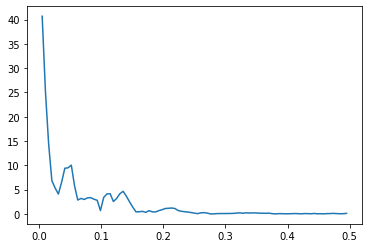

In [36]:
from numpy import fft

freqs = fft.fftfreq(len(b))

mask = freqs > 0

nwaves = freqs*len(b) #wave numbers: number of waves the signal needs to occupy the domain

fftvals = fft.fft(new)

fft_th = 2.0*np.abs(fftvals/len(b))
#print (fft_th[mask])

plt.plot(freqs[mask], fft_th[mask])
plt.show()

In [37]:
#conversion of the frequencies of the higher peaks to meters (?)

higher = np.where(fft_th[mask]>= 5.0e+00)
print(higher)

high_freq = []

for i in range(len(higher)):
    high_freq.append(freqs[mask][higher[i]])
    
print(high_freq)

high_freq_px = 1/high_freq[0]

high_freq_converted = Conversion(high_freq_px)
print (high_freq_converted[2])

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10], dtype=int64),)
[array([0.00520833, 0.01041667, 0.015625  , 0.02083333, 0.02604167,
       0.03645833, 0.04166667, 0.046875  , 0.05208333, 0.05729167])]
Thickness [sec] [7.20000000e-06 3.60000000e-06 2.40000000e-06 1.80000000e-06
 1.44000000e-06 1.02857143e-06 9.00000000e-07 8.00000000e-07
 7.20000000e-07 6.54545455e-07]
Maximum thickness [microsec] 7.199999999999999
Thickness [m]: [608.09009139 304.0450457  202.69669713 152.02252285 121.61801828
  86.87001306  76.01126142  67.56556571  60.80900914  55.2809174 ]
Maximum thickness [m]: 608.0900913941282
Average thickness [m]: 173.50091420798339
[608.09009139 304.0450457  202.69669713 152.02252285 121.61801828
  86.87001306  76.01126142  67.56556571  60.80900914  55.2809174 ]


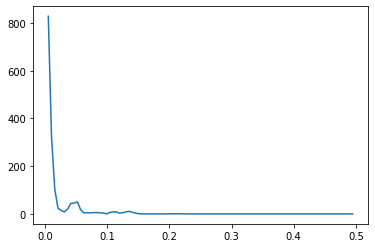

In [38]:
#power spectrum
ps = 2.0*(np.abs(fftvals/len(b))**2)

plt.plot(freqs[mask], ps[mask])
plt.show()

In [39]:
#cross checks

mean_new = np.mean(new)
std_new = np.std(new)
var_new = std_new**2

print (mean_new, std_new, var_new)

#sum of ps values
print ('ps sum:', np.sum(ps[mask]))
#number of values equal between var_new and ps sum give an idea of accuracy

65.63541666666667 39.706768889695894 1576.6274956597217
ps sum: 1576.6270616319441


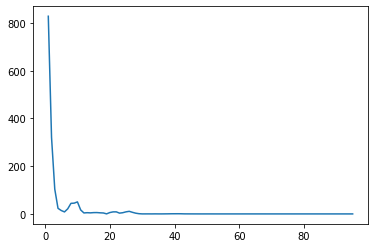

In [40]:
plt.plot(nwaves[mask], ps[mask])
plt.show()

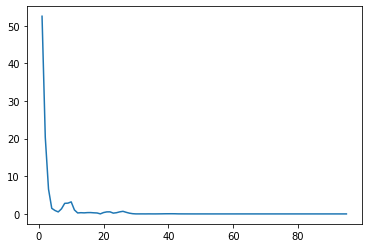

In [41]:
#to understand in witch percentage every freq contribute to the total signal

pow_var = ps/var_new*100.0

plt.plot(nwaves[mask], pow_var[mask])
plt.show()

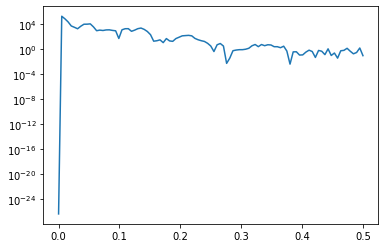

In [42]:
#Periodgram

f, Pxx_den = signal.periodogram(new)
plt.semilogy(f, Pxx_den)
#plt.plot(f,Pxx_den)
plt.show()

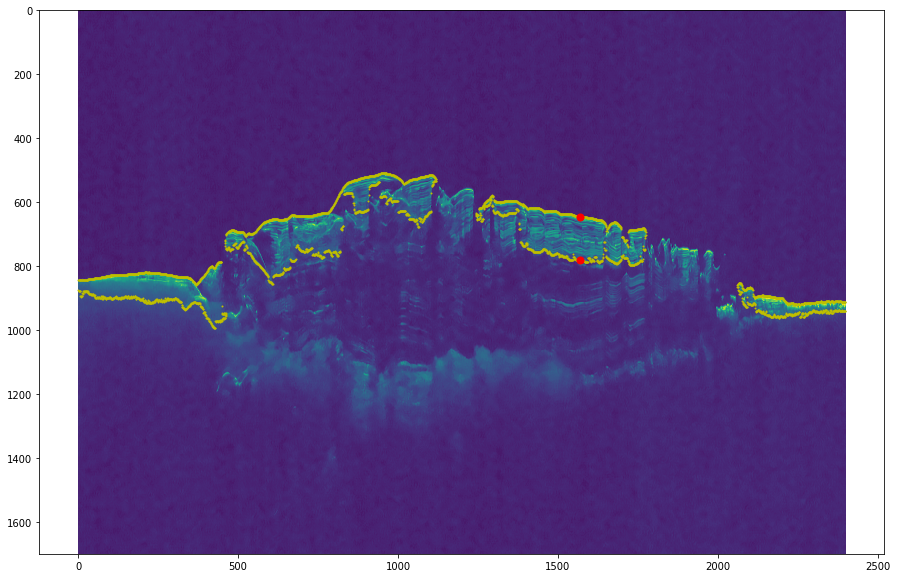

In [43]:
#second attempt
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[1450],lowerlimitx[1450], c='r', s=50)
plt.scatter(upperlimity[1450],upperlimitx[1450], c='r', s=50)

135 134 134 134
646 781
647 781
647 781
647 781


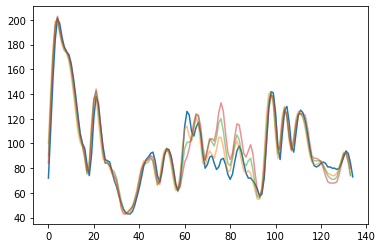

In [44]:
e = imgInTiny[upperlimitx[1450]:lowerlimitx[1450],upperlimity[1450]]
plot(e)
f = imgInTiny[upperlimitx[1451]:lowerlimitx[1451],upperlimity[1451]]
plot(f,alpha=0.5)
g = imgInTiny[upperlimitx[1452]:lowerlimitx[1452],upperlimity[1452]]
plot(g,alpha=0.5)
h = imgInTiny[upperlimitx[1453]:lowerlimitx[1453],upperlimity[1453]]
plot(h,alpha=0.5)

print (len(e), len(f), len(g), len(h))
print (upperlimitx[1450], lowerlimitx[1450]) #different initial coordinate
print (upperlimitx[1451], lowerlimitx[1451])
print (upperlimitx[1452], lowerlimitx[1452])
print (upperlimitx[1453], lowerlimitx[1453])

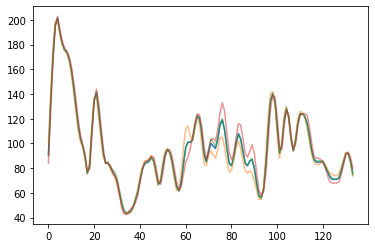

In [45]:
#case in which the selected columns have the same lenght and initial and final point (only f, g, h)

new1 = np.zeros_like(f) 
for i in range(len(f)):
    new1[i] = (np.uint16(f[i])+np.uint16(g[i])+np.uint16(h[i]))/3

    
plot(new1)
plot(f,alpha=0.5)
plot(g,alpha=0.5)
plot(h,alpha=0.5)

C:\Users\Alfonso Lovati\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 134, using nperseg = 134
  .format(nperseg, input_length))


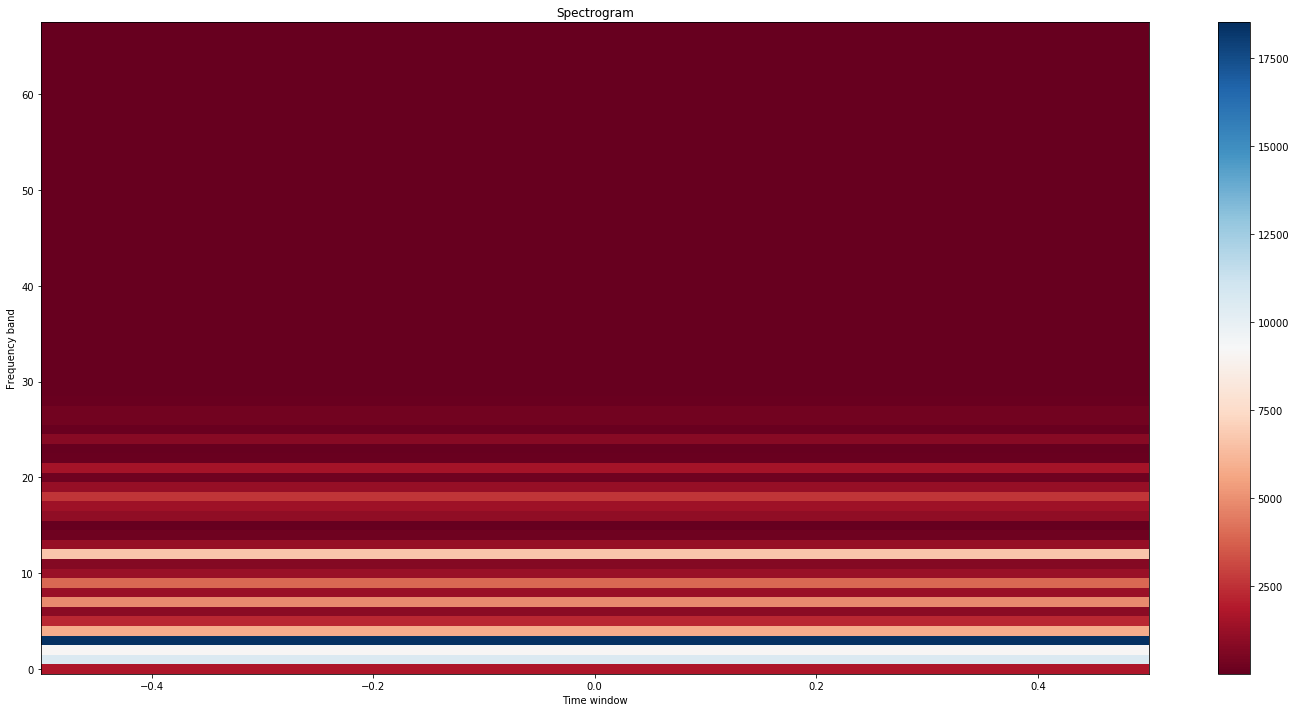

In [46]:
from scipy import signal

freqs11, times1, spectrogram1 = signal.spectrogram(new1) #, fs)

plt.figure(figsize=(20, 10))
plt.imshow(spectrogram1, aspect='auto', cmap='RdBu', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.colorbar()
plt.tight_layout()

In [47]:
print (1/freqs1[1:])
print (np.mean(freqs1))
print (np.std(freqs1))

[192.          96.          64.          48.          38.4
  32.          27.42857143  24.          21.33333333  19.2
  17.45454545  16.          14.76923077  13.71428571  12.8
  12.          11.29411765  10.66666667  10.10526316   9.6
   9.14285714   8.72727273   8.34782609   8.           7.68
   7.38461538   7.11111111   6.85714286   6.62068966   6.4
   6.19354839   6.           5.81818182   5.64705882   5.48571429
   5.33333333   5.18918919   5.05263158   4.92307692   4.8
   4.68292683   4.57142857   4.46511628   4.36363636   4.26666667
   4.17391304   4.08510638   4.           3.91836735   3.84
   3.76470588   3.69230769   3.62264151   3.55555556   3.49090909
   3.42857143   3.36842105   3.31034483   3.25423729   3.2
   3.14754098   3.09677419   3.04761905   3.           2.95384615
   2.90909091   2.86567164   2.82352941   2.7826087    2.74285714
   2.70422535   2.66666667   2.63013699   2.59459459   2.56
   2.52631579   2.49350649   2.46153846   2.43037975   2.4
   2.37037037   2.

[14.95507371 18.37524007 19.700933   16.53461485  5.98244988  9.06679452
 14.38308075  3.40731815  7.64045924  5.90072126  4.2960441   6.98573749
  4.30603429  3.60591984  3.20540655  5.78111228  6.30594692  4.07217601
  2.6781733   3.64533345  5.28834575  2.25205715  1.20005139  3.56563805
  2.10947759  1.14640895  1.6683203   1.2445018   1.34053781  0.862873
  0.47859572  0.64293038  0.38384062  0.09298426  0.32420003  0.45561789
  0.57218838  0.43701871  0.1546538   0.15441006  0.26809808  0.41622493
  0.16950964  0.18716732  0.24339387  0.36358759  0.09833934  0.09387636
  0.1642427   0.1408538   0.07090267  0.15825145  0.24191959  0.20734525
  0.14006845  0.13396513  0.12834606  0.09029937  0.04241483  0.06533958
  0.10557144  0.02230711  0.08374803  0.02673817  0.10266075  0.03348352]


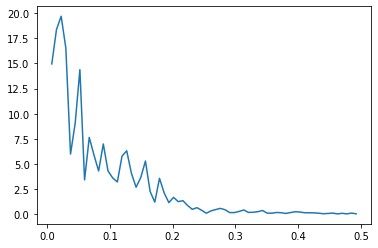

In [48]:
freqs2 = fft.fftfreq(len(f))

mask2 = freqs2 > 0

nwaves2 = freqs2*len(f) #wave numbers: number of waves the signal needs to occupy the domain

fftvals2 = fft.fft(new1)

fft_th2 = 2.0*np.abs(fftvals2/len(f))
print (fft_th2[mask2])

plt.plot(freqs2[mask2], fft_th2[mask2])
plt.show()

In [49]:
#conversion of the frequencies of the higher peaks to meters (?)

higher2 = np.where(fft_th2[mask2]>= 5.0e+00)
print(higher2)

high_freq2 = []

for i in range(len(higher2)):
    high_freq2.append(freqs2[mask2][higher2[i]])
    
print(high_freq2)

high_freq_px2 = 1/high_freq2[0]

high_freq_converted2 = Conversion(high_freq_px2)
print (high_freq_converted2[2])

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11, 15, 16, 20], dtype=int64),)
[array([0.00746269, 0.01492537, 0.02238806, 0.02985075, 0.03731343,
       0.04477612, 0.05223881, 0.06716418, 0.07462687, 0.08955224,
       0.11940299, 0.12686567, 0.15671642])]
Thickness [sec] [5.02500000e-06 2.51250000e-06 1.67500000e-06 1.25625000e-06
 1.00500000e-06 8.37500000e-07 7.17857143e-07 5.58333333e-07
 5.02500000e-07 4.18750000e-07 3.14062500e-07 2.95588235e-07
 2.39285714e-07]
Maximum thickness [microsec] 5.025
Thickness [m]: [424.39620962 212.19810481 141.46540321 106.0990524   84.87924192
  70.7327016   60.62802995  47.1551344   42.43962096  35.3663508
  26.5247631   24.96448292  20.20934332]
Maximum thickness [m]: 424.39620961881866
Average thickness [m]: 99.77372607786957
[424.39620962 212.19810481 141.46540321 106.0990524   84.87924192
  70.7327016   60.62802995  47.1551344   42.43962096  35.3663508
  26.5247631   24.96448292  20.20934332]


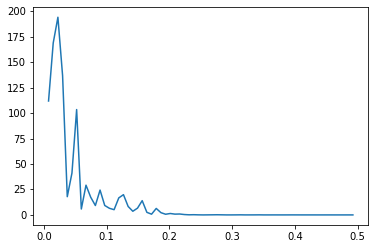

In [50]:
#power spectrum
ps2 = 2.0*(np.abs(fftvals2/len(f))**2)

plt.plot(freqs2[mask2], ps2[mask2])
plt.show()